Data for test


outliers,0 - letter,1 - email,2 - form,3 - handwritten,4 - advertisement,5 - scientific report,6 - scientific publication,7 - specification,8 - file folder,9 - news article,10 - budget,11 - invoice,12 - presentation,13 - questionnaire,14 resume,15 - memo,All
inliers,,,,,,,,,,,,,,,,,
0 - letter,NaN,0.465116,0.741729,0.978938,0.726190,0.530385,0.769778,0.978938,0.797827,0.530385,0.636057,0.915854,0.530385,0.636057,1.000000,0.465116,0.713517
1 - email,0.465116,NaN,0.595653,0.934122,0.595653,0.465116,0.915854,0.746726,0.722851,0.465116,0.465116,0.636057,0.595653,0.769778,0.943902,0.465116,0.652122
2 - form,0.465116,0.465116,NaN,0.971951,0.769778,0.701326,0.943902,0.971951,0.766594,0.636057,0.806998,0.847401,0.465116,0.766594,1.000000,0.465116,0.736201
3 - handwritten,0.595653,0.465116,0.595653,NaN,0.608676,0.564265,0.636057,0.599198,0.552578,0.465116,0.458749,0.535650,0.579959,0.660922,0.875450,0.595653,0.585913
4 - advertisement,0.463415,0.522104,0.634752,0.666600,NaN,0.463415,0.659604,0.700149,0.463415,0.460061,0.528811,0.590854,0.460061,0.509592,0.887179,0.463415,0.564895
5 - scientific report,0.465116,0.465116,0.741729,0.957875,0.636057,NaN,0.595653,0.701326,0.863095,0.465116,0.701326,0.701326,0.570788,0.664106,0.748716,0.465116,0.649497
6 - scientific publication,0.636057,0.701326,0.931548,0.885011,0.847401,0.530385,NaN,0.943902,0.903499,0.465116,0.866279,0.915854,0.726190,0.887805,0.931548,0.595653,0.784505
7 - specification,0.465116,0.530385,0.726190,0.957875,0.461932,0.465116,0.835046,NaN,0.735206,0.465116,0.530385,0.726190,0.636057,0.530385,1.000000,0.530385,0.639692
8 - file folder,0.411064,0.337566,0.400075,0.451852,0.508793,0.383704,0.482869,0.423810,NaN,0.427513,0.437037,0.404672,0.350034,0.425185,0.376630,0.364093,0.412326


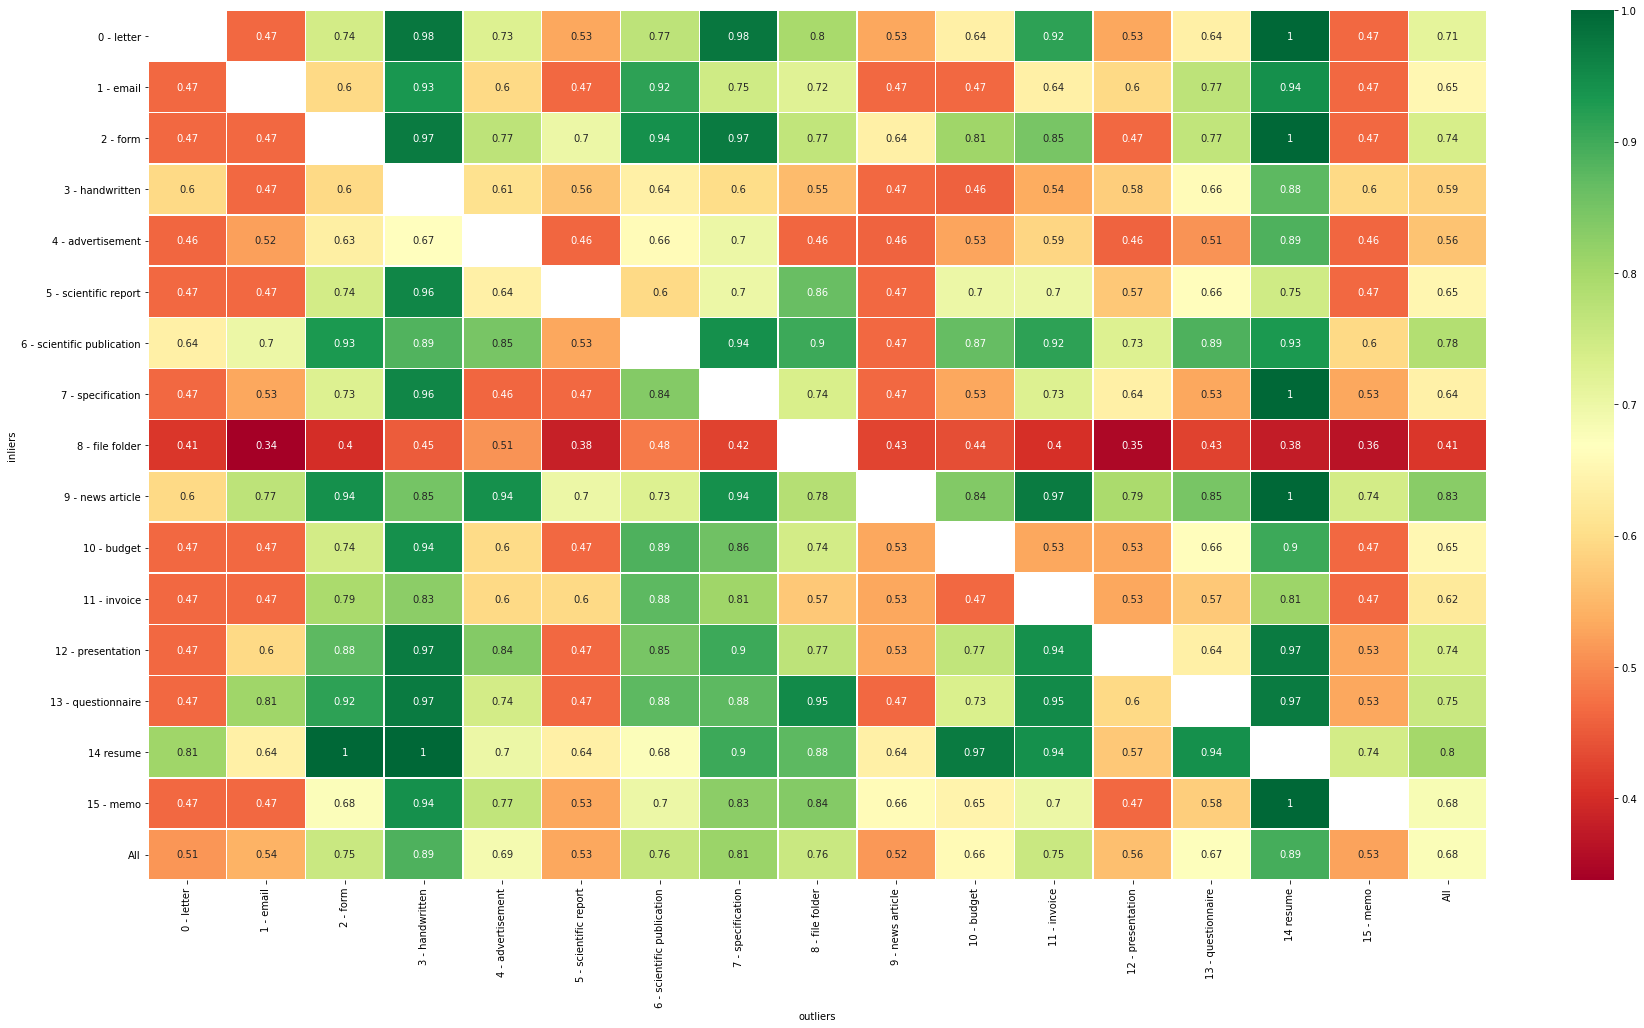

In [99]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from natsort import natsorted, order_by_index, index_natsorted
%matplotlib inline

plt.figure(figsize=(30,16))
data = "test"
inliers = "inliers"
outliers = "outliers"
score = "f1_macro"

files = ["/home/philipp/projects/dad4td/reports/semisupervised/sup_combs_rvl_0004.tsv", 
         "/home/philipp/projects/dad4td/reports/semisupervised/semisup_rvl_pw_0001.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)

remap = {0: "0 - letter", 1: "1 - email", 2: "2 - form", 3: "3 - handwritten", 4: "4 - advertisement", 
         5: "5 - scientific report", 6: "6 - scientific publication", 7: "7 - specification", 
         8: "8 - file folder", 9: "9 - news article", 10: "10 - budget", 11: "11 - invoice", 
         12: "12 - presentation",13: "13 - questionnaire", 14:"14 resume", 15: "15 - memo"}
df[inliers] = df[inliers].map(lambda x: int(x.strip("[]")))
df[outliers] = df[outliers].map(lambda x: int(x.strip("[]")))
df = df.replace({"inliers":remap, "outliers":remap})

df = df.where(df.data == data).dropna()
df = df.where(df.labeled_data == 1.0).dropna()

df = df[[score, inliers, outliers]]
df = df.pivot_table(columns=outliers, index=inliers, values=score, margins=True)

df = df.reindex(index=order_by_index(df.index, index_natsorted(df.index)))
df = df.reindex(natsorted(df.columns), axis=1)

print(f"Data for {data}")
sns.heatmap(df, cmap='RdYlGn', linewidths=0.5, annot=True)
df

Data for test


outliers,0 - letter,1 - email,2 - form,3 - handwritten,4 - advertisement,5 - scientific report,6 - scientific publication,7 - specification,8 - file folder,9 - news article,10 - budget,11 - invoice,12 - presentation,13 - questionnaire,14 resume,15 - memo,All
inliers,,,,,,,,,,,,,,,,,
0 - letter,NaN,0.014795,-0.326814,-0.514777,-0.236458,-0.041693,-0.260325,-0.404314,-0.211736,-0.042482,-0.067263,-0.471937,-0.034959,-0.075099,-0.014414,0.032109,-0.177024
1 - email,-0.005921,NaN,-0.133156,-0.494257,-0.082980,0.077169,-0.446781,-0.251339,-0.258873,-0.021258,0.032750,-0.111336,-0.046002,-0.205357,-0.520350,-0.029681,-0.166492
2 - form,-0.047998,-0.029164,NaN,-0.414192,-0.297021,-0.065626,-0.264109,-0.445326,-0.111057,-0.065650,-0.331747,-0.394423,0.012551,-0.140153,-0.160076,-0.029512,-0.185567
3 - handwritten,-0.129302,0.002727,-0.130808,NaN,-0.154605,-0.100942,-0.172721,-0.135874,0.031704,0.030757,0.038634,-0.036188,-0.116645,-0.197608,-0.379577,-0.132330,-0.105519
4 - advertisement,0.000562,-0.055170,-0.160569,-0.201137,NaN,-0.027342,-0.192670,-0.234685,0.114111,0.005402,-0.066337,-0.131390,0.000916,-0.048615,-0.420246,0.002049,-0.094342
5 - scientific report,0.034228,0.082743,-0.303658,-0.431059,-0.196931,NaN,-0.065921,-0.107653,-0.378864,0.001957,-0.172105,-0.235437,-0.075824,-0.183948,-0.307311,-0.030317,-0.158007
6 - scientific publication,-0.196088,-0.254656,-0.335802,-0.313209,-0.407486,-0.071337,NaN,-0.297236,-0.049653,0.020081,-0.242859,-0.340713,-0.250775,-0.456588,-0.493522,-0.052048,-0.249459
7 - specification,-0.033948,-0.095315,-0.307193,-0.540460,-0.054142,-0.030306,-0.407061,NaN,-0.199452,-0.047695,-0.099101,-0.294961,-0.204827,-0.097151,-0.582579,-0.127548,-0.208116
8 - file folder,0.014558,0.070162,0.001413,-0.042359,-0.101140,0.055316,-0.075140,-0.022321,NaN,-0.015803,-0.044313,0.007037,0.069801,-0.005350,0.035080,0.047617,-0.000363


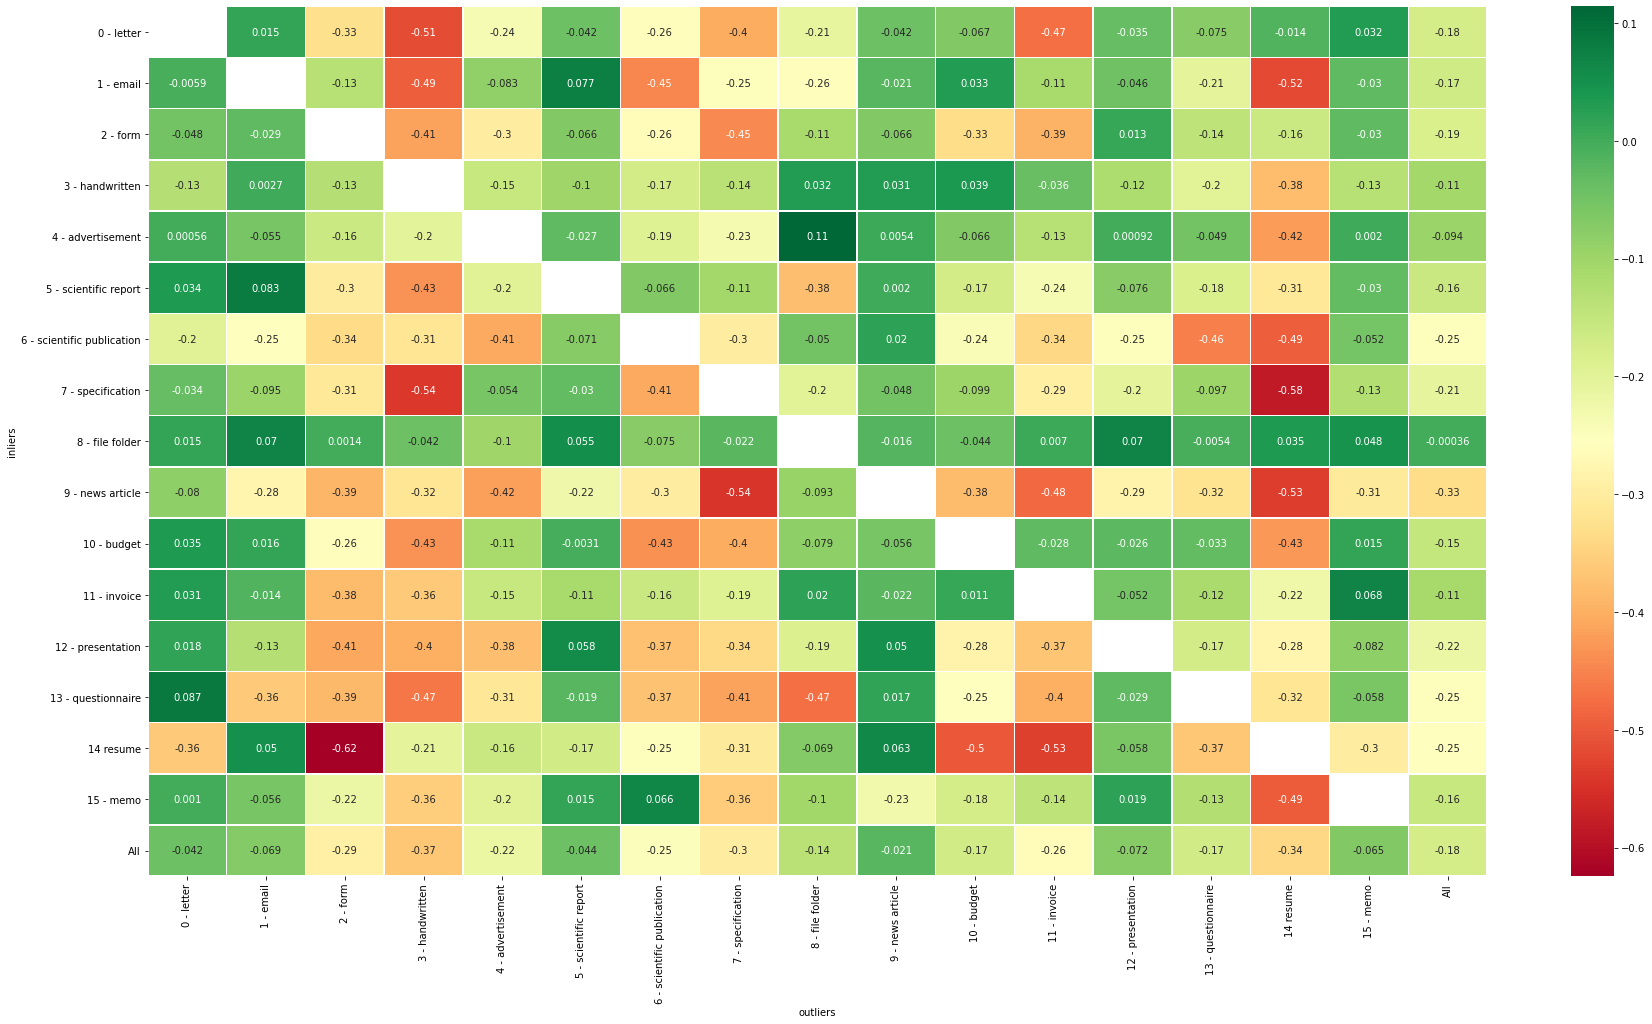

In [97]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,16))
data = "test"
inliers = "inliers"
outliers = "outliers"
score = "f1_macro"

files = ["/home/philipp/projects/dad4td/reports/semisupervised/sup_combs_rvl_0004.tsv", 
         "/home/philipp/projects/dad4td/reports/semisupervised/semisup_rvl_pw_0001.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)


df[inliers] = df[inliers].map(lambda x: int(x.strip("[]")))
df[outliers] = df[outliers].map(lambda x: int(x.strip("[]")))
df = df.replace({"inliers":remap, "outliers":remap})

df = df.where(df.data == data).dropna()
df_semi = df.where(df.labeled_data == 0.5).dropna()[[score, inliers, outliers]]
df_super = df.where(df.labeled_data == 1.0).dropna()[[score, inliers, outliers]]

df_semi = df_semi.pivot_table(columns=outliers, index=inliers, values=score, margins=True)
df_super = df_super.pivot_table(columns=outliers, index=inliers, values=score, margins=True)
df = df_semi - df_super

df = df.reindex(index=order_by_index(df.index, index_natsorted(df.index)))
df = df.reindex(natsorted(df.columns), axis=1)

print(f"Data for {data}")
sns.heatmap(df, cmap='RdYlGn', linewidths=0.5, annot=True)
df

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate
%matplotlib inline

plt.figure(figsize=(300,160))

score_cols = ['f1_macro',
              'in_f1',
              'in_prec',
              'in_rec',
              'out_f1',
              'out_prec',
              'out_rec'
             ]

data = "test"
inliers = "inliers"
outliers = "outliers"
score = "f1_macro"

files = ["/home/philipp/projects/dad4td/reports/supervised/sup_split_0012.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)

df = df.where(df.data == data).dropna()

groupcols = ["fixed_cont", "n_class", "n_oe"]
df = df.groupby(groupcols).mean()[score_cols]
df = df.round(2)
#print(tabulate(df, df.columns, tablefmt="rst"))
df

f1_macro  in_f1  in_prec  in_rec  out_f1  \
fixed_cont n_class n_oe                                                
0.05       250.0   0.0          0.22   0.44     0.28    1.00    0.00   
                   50.0         0.22   0.44     0.28    1.00    0.01   
                   500.0        0.30   0.45     0.29    0.99    0.15   
                   2000.0       0.34   0.46     0.30    0.97    0.22   
                   10000.0      0.40   0.47     0.31    0.93    0.34   
           1500.0  0.0          0.29   0.45     0.29    1.00    0.14   
                   50.0         0.33   0.46     0.30    1.00    0.20   
                   500.0        0.35   0.47     0.31    1.00    0.23   
                   2000.0       0.37   0.47     0.31    0.99    0.26   
                   10000.0      0.39   0.48     0.32    0.98    0.30   
           7500.0  0.0          0.43   0.49     0.33    1.00    0.36   
                   50.0         0.41   0.49     0.33    1.00    0.34   
                   500.0        0.42   0.49     0.33    1.00    0.35   
                   2000.0       0.43   0.49     0.33    1.00    0.36   
                   10000.0      0.44   0.50     0.33    0.99    0.38   
           20000.0 0.0          0.46   0.51     0.34    1.00    0.42   
                   50.0         0.46   0.51     0.34    1.00    0.42   
                   500.0        0.47   0.51     0.34    1.00    0.43   
                   2000.0       0.47   0.51     0.35    1.00    0.43   
                   10000.0      0.47   0.51     0.34    0.99    0.43   
0.10       250.0   0.0          0.26   0.44     0.29    1.00    0.07   
                   50.0         0.25   0.44     0.28    1.00    0.06   
                   500.0        0.35   0.47     0.31    0.99    0.24   
                   2000.0       0.38   0.47     0.31    0.97    0.28   
                   10000.0      0.42   0.48     0.32    0.93    0.37   
           1500.0  0.0          0.44   0.50     0.33    0.99    0.38   
                   50.0         0.44   0.50     0.33    0.99    0.38   
                   500.0        0.44   0.50     0.33    0.99    0.39   
                   2000.0       0.48   0.51     0.35    0.98    0.44   
                   10000.0      0.47   0.51     0.34    0.97    0.43   
           7500.0  0.0          0.54   0.54     0.38    0.98    0.54   
                   50.0         0.54   0.54     0.37    0.98    0.53   
                   500.0        0.54   0.54     0.38    0.98    0.54   
                   2000.0       0.55   0.55     0.38    0.98    0.55   
                   10000.0      0.54   0.55     0.38    0.98    0.54   
           20000.0 0.0          0.57   0.56     0.39    0.98    0.57   
                   50.0         0.57   0.56     0.39    0.99    0.58   
                   500.0        0.57   0.56     0.39    0.99    0.58   
                   2000.0       0.56   0.56     0.39    0.99    0.57   
                   10000.0      0.57   0.56     0.39    0.98    0.58   
0.20       250.0   0.0          0.44   0.50     0.33    0.98    0.38   
                   50.0         0.40   0.48     0.32    0.99    0.31   
                   500.0        0.47   0.51     0.34    0.97    0.43   
                   2000.0       0.49   0.51     0.35    0.96    0.47   
                   10000.0      0.50   0.51     0.35    0.92    0.50   
           1500.0  0.0          0.61   0.58     0.42    0.95    0.65   
                   50.0         0.62   0.58     0.42    0.95    0.66   
                   500.0        0.62   0.58     0.42    0.95    0.65   
                   2000.0       0.61   0.58     0.41    0.95    0.64   
                   10000.0      0.61   0.58     0.42    0.94    0.65   
           7500.0  0.0          0.67   0.62     0.46    0.94    0.72   
                   50.0         0.67   0.62     0.47    0.94    0.73   
                   500.0        0.67   0.62     0.46    0.95    0.72   
                   2000.0       0.67   0.62     0.46    0.95    0.71

<Figure size 21600x11520 with 0 Axes>

In [22]:
files = ["/home/philipp/projects/dad4td/reports/supervised/sup_split_0012.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
groupcols = ["n_oe", "n_class", "fixed_cont"]
df = df.groupby(groupcols).mean()[score_cols]

df.sort_values(by=["f1_macro"], ascending=False).head(50)

,,,f1_macro,in_f1,in_prec,in_rec,out_f1,out_prec,out_rec
n_oe,n_class,fixed_cont,,,,,,,
10000.0,20000.0,0.20,0.689198,0.637419,0.478395,0.954822,0.740976,0.971739,0.598787
50.0,20000.0,0.20,0.688665,0.636736,0.477948,0.953553,0.740594,0.970971,0.598592
500.0,20000.0,0.20,0.688115,0.636175,0.477439,0.953046,0.740054,0.970634,0.598005
2000.0,20000.0,0.20,0.687026,0.635763,0.476343,0.955584,0.738289,0.972058,0.595168
0.0,20000.0,0.20,0.686825,0.635197,0.476301,0.953299,0.738454,0.970700,0.595951
50.0,7500.0,0.20,0.674333,0.623196,0.465562,0.942978,0.725469,0.963728,0.582094
0.0,7500.0,0.20,0.673106,0.622149,0.464225,0.943316,0.724063,0.963796,0.580073
10000.0,7500.0,0.20,0.671833,0.621268,0.462951,0.944332,0.722398,0.964240,0.577660
500.0,7500.0,0.20,0.668712,0.619239,0.460356,0.946024,0.718185,0.964962,0.572183


<AxesSubplot:ylabel='Frequency'>

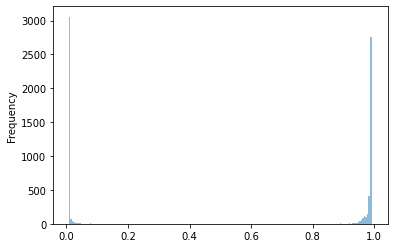

In [39]:
files = ["/home/philipp/projects/dad4td/reports/supervised/best_pred_sup_split_0001.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df[["text","text_len", "target", "label", "pred"]]
df["pred"].plot.hist(bins=200, alpha=0.5)

In [194]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

files = ["/home/philipp/projects/dad4td/reports/supervised/best_pred_sup_split_0001.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df[["text","text_len", "target", "label", "pred"]]

threshold = 0.5
df["pred_class"] = np.where(df.pred > threshold, 1, 0)

#confusion_matrix(y_true=df.label, y_pred=df.pred_class, labels=df.target, normalize='true')
print(classification_report(y_true=df.label, y_pred=df.pred_class, labels=range(0, 2)))

              precision    recall  f1-score   support

           0       0.97      0.62      0.75      5112
           1       0.49      0.95      0.64      1970

    accuracy                           0.71      7082
   macro avg       0.73      0.78      0.70      7082
weighted avg       0.83      0.71      0.72      7082



In [230]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

files = ["/home/philipp/projects/dad4td/reports/supervised/best_pred_sup_split_0001.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df[["text","text_len", "target", "label", "pred"]]

remap = {0: "0 - letter", 1: "1 - email", 2: "2 - form", 3: "3 - handwritten", 4: "4 - advertisement", 
         5: "5 - scientific report", 6: "6 - scientific publication", 7: "7 - specification", 
         8: "8 - file folder", 9: "9 - news article", 10: "10 - budget", 11: "11 - invoice", 
         12: "12 - presentation",13: "13 - questionnaire", 14:"14 resume", 15: "15 - memo"}

df = df.replace({"target":remap})
threshold = 0.5
df["pred_class"] = np.where(df.pred > threshold, 1, 0)

df["correct"] = df.pred_class == df.label 
df.groupby(["label", "target"])["correct"].value_counts(normalize=True)

label  target                      correct
0      10 - budget                 True       0.501062
                                   False      0.498938
       12 - presentation           True       0.620087
                                   False      0.379913
       13 - questionnaire          True       0.707983
                                   False      0.292017
       14 resume                   True       0.882591
                                   False      0.117409
       15 - memo                   False      0.780242
                                   True       0.219758
       3 - handwritten             False      0.595300
                                   True       0.404700
       4 - advertisement           True       0.628763
                                   False      0.371237
       5 - scientific report       True       0.560254
                                   False      0.439746
       6 - scientific publication  True       0.789047
                      

<AxesSubplot:ylabel='label,target'>

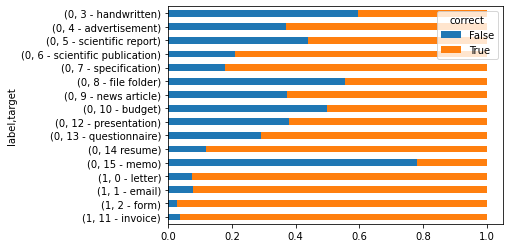

In [225]:
from natsort import natsorted, order_by_index, index_natsorted
remap = {0: "0 - letter", 1: "1 - email", 2: "2 - form", 3: "3 - handwritten", 4: "4 - advertisement", 
         5: "5 - scientific report", 6: "6 - scientific publication", 7: "7 - specification", 
         8: "8 - file folder", 9: "9 - news article", 10: "10 - budget", 11: "11 - invoice", 
         12: "12 - presentation",13: "13 - questionnaire", 14:"14 resume", 15: "15 - memo"}

df = df.replace({"target":remap})
df_cross = pd.crosstab([df.label, df.target], df.correct, normalize= 'index' )
df_cross = df_cross.reindex(index=order_by_index(df_cross.index, index_natsorted(df_cross.index)))
df_cross = df_cross.iloc[::-1]
df_cross.plot.barh(stacked=True)

In [ ]:
from natsort import natsorted, order_by_index, index_natsorted
remap = {0: "0 - letter", 1: "1 - email", 2: "2 - form", 3: "3 - handwritten", 4: "4 - advertisement", 
         5: "5 - scientific report", 6: "6 - scientific publication", 7: "7 - specification", 
         8: "8 - file folder", 9: "9 - news article", 10: "10 - budget", 11: "11 - invoice", 
         12: "12 - presentation",13: "13 - questionnaire", 14:"14 resume", 15: "15 - memo"}

df = df.replace({"target":remap})
df_cross = pd.crosstab([df.label, df.target], df.correct, normalize= 'index' )
df_cross = df_cross.reindex(index=order_by_index(df_cross.index, index_natsorted(df_cross.index)))
df_cross = df_cross.iloc[::-1]
df_cross.plot.barh(stacked=True)

In [62]:
import pandas as pd

inliers=[0, 1, 2, 11],
outliers= [3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]

data_path = "/home/philipp/projects/dad4td/data/raw/QS-OCR-Large/rvl_cdip.pkl"
df = pd.read_pickle(data_path)
df["text_len"] = df.text.map(lambda x:len(x))
df = df[["text","text_len", "target"]]
df["label"] = 1
df.loc[df.target.isin(outliers), "label"] = 0
df

,text,text_len,target,label
0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,22,3,0
1,\nZ Like to Have the Zippo Gia)\n~ SS Pack in ...,160,3,0
2,CO-INVESTIGATOR\n\nNAME POSITION/TITLE BIRTHDA...,2039,14,0
3,"Original Message\nFrom Wile, Vivian\nMonday, A...",482,2,1
4,04/18/98 09:37 G1 7+338-8886 MCKAY FRIED Boooz...,376,9,0
...,...,...,...,...
39995,The Tobacco Institute\nIndustry Support of Bio...,1027,10,0
39996,‘a.coweames\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,715,11,1
39997,ATION\nINTIAL MINNESOTA TOBACCO LITIG\nCONFIDE...,859,15,0
39998,"\nTHE WASHINGTON STAR\nSaturday, August 3, 196...",1672,9,0


In [144]:
import numpy as np

min_len = 0
df_shorts = df.where(df.text_len <= min_len).dropna().reset_index(drop=True)
pred_counts = df_shorts.label.value_counts()
label_counts = df.label.value_counts()
pred_counts_rel = df_shorts.label.value_counts(normalize=True)
label_counts_rel = df.label.value_counts(normalize=True)


rel_out_prec = pred_counts_rel[0]*label_counts_rel[0]
rel_in_prec = pred_counts_rel[1] * label_counts_rel[1]
macro_prec = (rel_out_prec+rel_in_prec)/2

print("outlier precision: ", pred_counts_rel[0])
print("inlier precision: ", pred_counts_rel[1])
print("relative outlier precision: ", rel_out_prec)
print("relative inlier precision: ", rel_in_prec)
print("macro precision: ", macro_prec)

print("\n---------------\n")


rel_out_rec = (pred_counts[0]/label_counts[0]) * label_counts_rel[0]
rel_in_rec = (1-pred_counts[1]/label_counts[1]) * label_counts_rel[1]
macro_recall = (rel_out_rec+rel_in_rec)/2
print("outlier recall: ", pred_counts[0]/label_counts[0])
print("inlier recall: ", 1-pred_counts[1]/label_counts[1])
print("relative outlier recall: ", rel_out_rec)
print("relative inlier recall: ", rel_in_rec)
print("macro recall: ", macro_recall)

print("\n---------------\n")

macro_f1 = 2*((macro_prec*macro_recall) / (macro_prec+macro_recall))
print("macro f1: ", macro_f1)

df_shorts.shape[0] / df.shape[0]

outlier precision:  0.9609181141439206
inlier precision:  0.039081885856079406
relative outlier precision:  0.7206879850326177
relative inlier precision:  0.009770495890259577
macro precision:  0.3652292404614386

---------------

outlier recall:  0.03098010326701089
inlier recall:  0.99622
relative outlier recall:  0.02323505808764522
relative inlier recall:  0.2490556226390566
macro recall:  0.1361453403633509

---------------

macro f1:  0.19835173602726916


0.024180060450151124

In [134]:
import numpy as np

for min_len in range(0,5000,20):
    df_shorts = df.where(df.text_len <= min_len).dropna().reset_index(drop=True)
    pred_counts = df_shorts.label.value_counts()
    label_counts = df.label.value_counts()
    pred_counts_rel = df_shorts.label.value_counts(normalize=True)
    label_counts_rel = df.label.value_counts(normalize=True)


    rel_out_prec = pred_counts_rel[0]*label_counts_rel[0]
    rel_in_prec = 1 - (pred_counts_rel[1] * label_counts_rel[1])
    macro_prec = (rel_out_prec+rel_in_prec)/2

    rel_out_rec = (pred_counts[0]/label_counts[0]) * label_counts_rel[0]
    rel_in_rec = 1-(pred_counts[1]/label_counts[1]) * label_counts_rel[1]
    macro_recall = (rel_out_rec+rel_in_rec)/2

    macro_f1 = 2*((macro_prec*macro_recall) / (macro_prec+macro_recall))
    
    rel_count = df_shorts.shape[0] / df.shape[0]
    print(f"{min_len}\nprec: {macro_prec}\nrecall: {macro_recall}\nf1: {macro_f1}\\\
    \n% of data: {rel_count}\nrelative f1 macro: {macro_f1*rel_count} \n\n------\n")

0
prec: 0.855458744571179
recall: 0.5111450278625697
f1: 0.6399272307735594\    
% of data: 0.024180060450151124
relative f1 macro: 0.015473479123802475 

------

20
prec: 0.8535528907265824
recall: 0.5331425828564571
f1: 0.6563306817332231\    
% of data: 0.07250518126295316
relative f1 macro: 0.04758737504750496 

------

40
prec: 0.8520636853667642
recall: 0.5468513671284179
f1: 0.6661622382176746\    
% of data: 0.1031677579193948
relative f1 macro: 0.06872646452748327 

------

60
prec: 0.8511504646087287
recall: 0.556966392415981
f1: 0.6733279291577872\    
% of data: 0.12594781486953718
relative f1 macro: 0.08480418136805383 

------

80
prec: 0.8499636738226997
recall: 0.56480891202228
f1: 0.6786490813766181\    
% of data: 0.14404286010715026
relative f1 macro: 0.09775455469057823 

------

100
prec: 0.8479535249390375
recall: 0.5708526771316929
f1: 0.682343422362026\    
% of data: 0.1588953972384931
relative f1 macro: 0.10842122914928701 

------

120
prec: 0.845331111097739

1020
prec: 0.7306604745295544
recall: 0.6277415693539233
f1: 0.6753022126421487\    
% of data: 0.6044890112225281
relative f1 macro: 0.40821276679643786 

------

1040
prec: 0.730491205995029
recall: 0.6290428226070566
f1: 0.6759819768266165\    
% of data: 0.6116265290663226
relative f1 macro: 0.41344851019785483 

------

1060
prec: 0.7303835697742442
recall: 0.6304803262008155
f1: 0.6767649177628282\    
% of data: 0.6190715476788692
relative f1 macro: 0.4189659050541967 

------

1080
prec: 0.7302758226059713
recall: 0.6318265795664488
f1: 0.6774933726000417\    
% of data: 0.6260990652476631
relative f1 macro: 0.42417796729637286 

------

1100
prec: 0.7301730550779997
recall: 0.6330840827102067
f1: 0.6781713089634024\    
% of data: 0.6326890817227043
relative f1 macro: 0.42907158271873946 

------

1120
prec: 0.7301035241764451
recall: 0.6343703359258398
f1: 0.6788785500921674\    
% of data: 0.6392265980664952
relative f1 macro: 0.4339572260757309 

------

1140
prec: 0.730077

2040
prec: 0.7359379480984903
recall: 0.6891579728949322
f1: 0.7117801644319663\    
% of data: 0.8525371313428284
relative f1 macro: 0.6068190195315553 

------

2060
prec: 0.7360574402497326
recall: 0.6899242248105621
f1: 0.7122445839566544\    
% of data: 0.8550696376740942
relative f1 macro: 0.6090187183391523 

------

2080
prec: 0.736161656455849
recall: 0.6906454766136916
f1: 0.7126775670007734\    
% of data: 0.8575121437803594
relative f1 macro: 0.611129668303004 

------

2100
prec: 0.736277808665175
recall: 0.6913754784386961
f1: 0.713120512981586\    
% of data: 0.8598971497428743
relative f1 macro: 0.6132102965360422 

------

2120
prec: 0.7363754485893899
recall: 0.6920679801699504
f1: 0.7135345496945958\    
% of data: 0.862252155630389
relative f1 macro: 0.6152467035909243 

------

2140
prec: 0.736492953288038
recall: 0.692797981994955
f1: 0.7139775663524125\    
% of data: 0.8646171615429039
relative f1 macro: 0.6173172568249332 

------

2160
prec: 0.7366057357804718

3060
prec: 0.7417898046654532
recall: 0.717749294373236
f1: 0.7295715602583885\    
% of data: 0.9322248305620764
relative f1 macro: 0.680124724144786 

------

3080
prec: 0.7418881798880246
recall: 0.7181530453826135
f1: 0.7298276877369534\    
% of data: 0.9331673329183323
relative f1 macro: 0.6810513568554463 

------

3100
prec: 0.7419837787976086
recall: 0.7185455463638659
f1: 0.7300765969492727\    
% of data: 0.934082335205838
relative f1 macro: 0.6819516525575081 

------

3120
prec: 0.742088058199522
recall: 0.7189780474451186
f1: 0.7303502847069677\    
% of data: 0.9350973377433444
relative f1 macro: 0.6829486068495791 

------

3140
prec: 0.742189879413959
recall: 0.7193717984294961
f1: 0.7306027195759256\    
% of data: 0.9359648399120998
relative f1 macro: 0.6838184574672259 

------

3160
prec: 0.7423063022229159
recall: 0.7198155495388738
f1: 0.7308879464689242\    
% of data: 0.9369273423183558
relative f1 macro: 0.6847889012176499 

------

3180
prec: 0.74240595549384

4080
prec: 0.7460031659352395
recall: 0.7342893357233393
f1: 0.7400999039694359\    
% of data: 0.9681099202748007
relative f1 macro: 0.7164980590272383 

------

4100
prec: 0.7460578957956626
recall: 0.7345018362545906
f1: 0.7402347673677655\    
% of data: 0.9685499213748034
relative f1 macro: 0.7169543257329452 

------

4120
prec: 0.7461097035467732
recall: 0.734710586776467
f1: 0.740366270876539\    
% of data: 0.9689974224935562
relative f1 macro: 0.7174130081805323 

------

4140
prec: 0.7461686934844014
recall: 0.7349418373545934
f1: 0.740512715489585\    
% of data: 0.9694799236998093
relative f1 macro: 0.7179122109115814 

------

4160
prec: 0.7462172959993051
recall: 0.7351318378295946
f1: 0.7406330887173029\    
% of data: 0.9698749246873117
relative f1 macro: 0.7183214611406252 

------

4180
prec: 0.7462681038596977
recall: 0.7353255883139708
f1: 0.7407564373542982\    
% of data: 0.9702674256685642
relative f1 macro: 0.7187318415191719 

------

4200
prec: 0.746323510440

In [150]:
import numpy as np

df["text_len"] = df.text.map(lambda x:len(x.replace("\n","")))
#df["text_len"] = df.text.map(lambda x:len(x))
df = df[["text","text_len", "target"]]
df["label"] = 1
df.loc[df.target.isin(outliers), "label"] = 0

min_len = 0
df["pred"] = np.where(df.text_len <= min_len, 0, 1)
df

/home/philipp/projects/dad4td/dad4tdenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/philipp/projects/dad4td/dad4tdenv/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,text,text_len,target,label,pred
0,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,0,3,0,0
1,\nZ Like to Have the Zippo Gia)\n~ SS Pack in ...,151,3,0,1
2,CO-INVESTIGATOR\n\nNAME POSITION/TITLE BIRTHDA...,1984,14,0,1
3,"Original Message\nFrom Wile, Vivian\nMonday, A...",469,2,1,1
4,04/18/98 09:37 G1 7+338-8886 MCKAY FRIED Boooz...,362,9,0,1
...,...,...,...,...,...
39995,The Tobacco Institute\nIndustry Support of Bio...,990,10,0,1
39996,‘a.coweames\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,647,11,1,1
39997,ATION\nINTIAL MINNESOTA TOBACCO LITIG\nCONFIDE...,837,15,0,1
39998,"\nTHE WASHINGTON STAR\nSaturday, August 3, 196...",1623,9,0,1


In [176]:
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm


def get_scores(scores, outlier_labels, outlier_pred, inlabel=1, outlabel=-1):
    scores[f"f1_macro"] = f1_score(
        outlier_labels, outlier_pred, average='macro')
    scores[f"f1_micro"] = f1_score(
        outlier_labels, outlier_pred, average='micro')
    scores[f"in_f1"] = f1_score(
        outlier_labels, outlier_pred, pos_label=inlabel)
    scores[f"in_rec"] = recall_score(
        outlier_labels, outlier_pred, pos_label=inlabel)
    scores[f"in_prec"] = precision_score(
        outlier_labels, outlier_pred, pos_label=inlabel)
    scores[f"out_f1"] = f1_score(
        outlier_labels, outlier_pred, pos_label=outlabel)
    scores[f"out_rec"] = recall_score(
        outlier_labels, outlier_pred, pos_label=outlabel)
    scores[f"out_prec"] = precision_score(
        outlier_labels, outlier_pred, pos_label=outlabel)
    return scores

df["text_len"] = df.text.map(lambda x:len(x.replace("\n","")))
#df["text_len"] = df.text.map(lambda x:len(x))
df = df[["text","text_len", "target"]]
df["label"] = 1
df.loc[df.target.isin(outliers), "label"] = 0


len_df = df.shape[0]
df_out = pd.DataFrame()
for min_len in tqdm(range(0, 2000, 1)):
    df_shorts = df.where(df.text_len <= min_len).dropna().reset_index(drop=True)
    df_shorts["pred"] = 0

    scores = get_scores(dict(), df_shorts.label, df_shorts.pred, outlabel=0)
    scores["_min_len"] = min_len
    relative = df_shorts.shape[0] / len_df
    scores["f1_all"] = scores["f1_micro"] * relative + (0.68 * (1-relative))
    df_out = df_out.append(scores, ignore_index=True)
df_out

/home/philipp/projects/dad4td/dad4tdenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,_min_len,f1_all,f1_macro,f1_micro,in_f1,in_prec,in_rec,out_f1,out_prec,out_rec
0,0.0,0.690279,0.488473,0.954931,0.0,0.0,0.0,0.976946,0.954931,1.0
1,1.0,0.690424,0.488495,0.955016,0.0,0.0,0.0,0.976991,0.955016,1.0
2,2.0,0.690630,0.488401,0.954654,0.0,0.0,0.0,0.976801,0.954654,1.0
3,3.0,0.690838,0.488468,0.954912,0.0,0.0,0.0,0.976936,0.954912,1.0
4,4.0,0.691026,0.488388,0.954608,0.0,0.0,0.0,0.976777,0.954608,1.0
...,...,...,...,...,...,...,...,...,...,...
1995,1995.0,0.715971,0.419322,0.722125,0.0,0.0,0.0,0.838644,0.722125,1.0
1996,1996.0,0.715981,0.419324,0.722131,0.0,0.0,0.0,0.838648,0.722131,1.0
1997,1997.0,0.716002,0.419330,0.722149,0.0,0.0,0.0,0.838660,0.722149,1.0
1998,1998.0,0.716015,0.419333,0.722158,0.0,0.0,0.0,0.838667,0.722158,1.0


<AxesSubplot:>

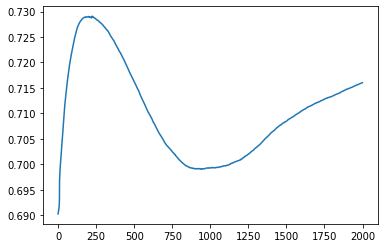

In [177]:
df_out.f1_all.plot()

In [179]:
max(df_out.f1_all)
np.argmax(df_out.f1_all)

225

In [187]:
df["text_len"] = df.text.map(lambda x:len(x))
df = df[["text","text_len", "target"]]
df["label"] = 1
df.loc[df.target.isin(outliers), "label"] = 0


len_df = df.shape[0]
df_out = pd.DataFrame()
for min_len in tqdm(range(0, 2000, 10)):
    df_shorts = df.where(df.text_len <= min_len).dropna().reset_index(drop=True)
    df_shorts["pred"] = 0

    scores = get_scores(dict(), df_shorts.label, df_shorts.pred, outlabel=0)
    scores["_min_len"] = min_len
    relative = df_shorts.shape[0] / len_df
    scores["f1_all"] = scores["f1_micro"] * relative + (0.68 * (1-relative))
    df_out = df_out.append(scores, ignore_index=True)
df_out

/home/philipp/projects/dad4td/dad4tdenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,_min_len,f1_all,f1_macro,f1_micro,in_f1,in_prec,in_rec,out_f1,out_prec,out_rec
0,0.0,0.686793,0.490035,0.960918,0.0,0.0,0.0,0.980070,0.960918,1.0
1,10.0,0.692409,0.489299,0.958093,0.0,0.0,0.0,0.978598,0.958093,1.0
2,20.0,0.700092,0.489042,0.957106,0.0,0.0,0.0,0.978083,0.957106,1.0
3,30.0,0.704417,0.488461,0.954884,0.0,0.0,0.0,0.976922,0.954884,1.0
4,40.0,0.708281,0.488263,0.954128,0.0,0.0,0.0,0.976526,0.954128,1.0
...,...,...,...,...,...,...,...,...,...,...
195,1950.0,0.714565,0.418975,0.721095,0.0,0.0,0.0,0.837949,0.721095,1.0
196,1960.0,0.714695,0.419004,0.721181,0.0,0.0,0.0,0.838007,0.721181,1.0
197,1970.0,0.714817,0.419032,0.721264,0.0,0.0,0.0,0.838063,0.721264,1.0
198,1980.0,0.714943,0.419060,0.721348,0.0,0.0,0.0,0.838120,0.721348,1.0


<AxesSubplot:>

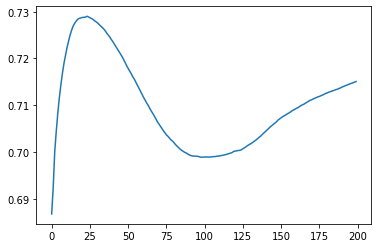

In [188]:
df_out.f1_all.plot()

In [189]:
np.argmax(df_out.f1_all)

23

In [192]:
min_len = 225
df_shorts = df.where(df.text_len <= min_len).dropna().reset_index(drop=True)
df_shorts.shape[0] / df.shape[0]

0.23324308310770778

In [193]:
df_out.loc[23]

_min_len    230.000000
f1_all        0.729023
f1_macro      0.469954
f1_micro      0.886629
in_f1         0.000000
in_prec       0.000000
in_rec        0.000000
out_f1        0.939908
out_prec      0.886629
out_rec       1.000000
Name: 23, dtype: float64